In [1]:
import sys
sys.path.append("..")

# deeptrack - Tracking point particles

This notebook demonstrates how to track point particles with a convolutional neural network using DeepTrack.

TBD: Add general description of example.

## 1. Setup

Imports needed for this tutorial.

In [3]:
from deeptrack.scatterers import PointParticle
from deeptrack.optics import OpticalDevice
from deeptrack.image import Image
from deeptrack.generators import Generator
from deeptrack.models import convolutional

import numpy as np
import matplotlib.pyplot as plt

## 2. Define the particle

For this example, we consider a point particle (i.e. a point light source). A point particle is entirely defined by its intensity and its position. A point particle is an instance of the class PointParticle.

A point particle is controlled by the following parameters:

* intensity: The intensity of the point particle

* position: The position of the point particle

* position_unit: "pixel" or "meter"

In [4]:
particle = PointParticle(                                         
    intensity=100,
    position=(32, 16),
    position_unit="pixel"
)

## 3. Define the optics 

Next, we need to define the properties of the optical system. This is done using an instance of the class Optics, which takes a set of light sources (particles) and convolves them with the pupil function (point spread function) of the otical system.

The optics is controlled by the following parameters:

* NA: The numerical aperature

* pixel_size: The pixel to meter conversion factor (m/px)

* wavelength: The wavelength of the lightsource (m)

* mode: "coherent" or "incoherent" light emitted by the object

* ROI: Region of interest that is imaged (to avoid wrap-around effects when Fourier-tranforming)

* upscale: upscale factor for the pupil function (increases accuracy and computational cost).

In [5]:
optics = OpticalDevice(
    NA=0.7,                
    pixel_size=0.1e-6,     
    wavelength=680e-9
)

## 4. Generate and plot the image

Finally, we have everything needed to create an image! 

#TBD This is not clear:

This is done using the class method `Generator.get`. This returns an Image object. This behaves exactly like a normal numpy ndarray, just additionally storing the properties used to generating the image as a list of dicts.

../deeptrack/optics.py:136: RuntimeWarning: invalid value encountered in power
  pupil = (RHO < 1) / ((1 - NA**2 / refractive_index_medium**2 * RHO)**0.25)
../deeptrack/optics.py:140: RuntimeWarning: invalid value encountered in sqrt
  z_shift = 2 * np.pi * refractive_index_medium/wavelength * (1 - NA**2 / refractive_index_medium**2 * RHO)**0.5 * pixel_size * defocus


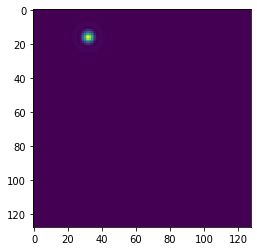

In [6]:
output_image = optics(particle).plot()

## 5. Randomize the particle position

We can generate particles with random positions by passing a lambda function to as `position`. 
When this lambda function is called, it returns a random pair of numbers representing the particle position. 

In the example below, we also plot the position of the particle.

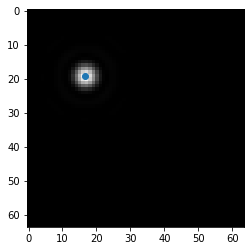

In [7]:
# Retrieves the current position of the particle
def get_position():
    return np.array(particle.properties["position"].current_value)

particle = PointParticle(                                         
    intensity=100,
    position=lambda: 10 + np.random.rand(2) * 44,
    position_unit="pixel"
)

input_image = Image(np.zeros((64, 64)))
output_image = optics(particle).resolve(input_image)

position = get_position()
plt.gray()
plt.imshow(output_image)
plt.scatter(position[0], position[1])
plt.show()

## 5. ??

???

In [ ]:
G = Generator()

model = deeptrackNetwork(input_shape=(64, 64, 1), number_of_outputs=2)

# Divide position by 64 to get value between 0 and 1
def get_position(image):
    return np.array(particle.properties["position"].current_value / 64)

generator = G.generate(Optics(particle), get_position, shape=(64, 64), batch_size=4)


model.fit(
    generator,
    epochs=1000,
    steps_per_epoch=64
)

## 6. ??

??

In [ ]:
batch, label = next(generator)

prediction = model.predict(batch)

for i in range(batch.shape[0]):
    plt.gray()
    plt.imshow(np.squeeze(batch[i]))
    # Multiply back 64
    plt.scatter(prediction[i,0] * 64, prediction[i,1] * 64)
    plt.show()